In [1]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import lightgbm as lgb
from catboost import CatBoostClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report  
from sklearn.datasets import make_classification 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Loading datasets
telemetry = pd.read_csv('C:\\Users\PERSONAL PC\OneDrive - Robert Gordon University\RGU\IT 3\PD_ML_\Predictive_Maintenance\data\PdM_telemetry.csv')
errors = pd.read_csv('C:\\Users\PERSONAL PC\OneDrive - Robert Gordon University\RGU\IT 3\PD_ML_\Predictive_Maintenance\data\PdM_errors.csv')
failures = pd.read_csv('C:\\Users\PERSONAL PC\OneDrive - Robert Gordon University\RGU\IT 3\PD_ML_\Predictive_Maintenance\data\PdM_failures.csv')
machines = pd.read_csv('C:\\Users\PERSONAL PC\OneDrive - Robert Gordon University\RGU\IT 3\PD_ML_\Predictive_Maintenance\data\PdM_machines.csv')
maint = pd.read_csv('C:\\Users\PERSONAL PC\OneDrive - Robert Gordon University\RGU\IT 3\PD_ML_\Predictive_Maintenance\data\PdM_maint.csv')

In [3]:
# Display the first rows of TELEMETRY dataset
telemetry.head()
# print(telemetry.info())

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [4]:
# Display the first rows of ERROR dataset
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [5]:
# Display the first rows of FAILURES dataset
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [6]:
# Display the first rows of MACHINES dataset
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [7]:
# Display the first rows of MAINT dataset
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [8]:
# I Convet the datetime columns in the telemetry and other Dataset to filtering data based on date and time ranges
# Convert the 'datetime' column in the Telemetry dataFrame 
telemetry['datetime_new'] = pd.to_datetime(
    telemetry['datetime'],
    format="%Y-%m-%d %H:%M:%S"
)
print("---------------------------------------------Telemetry--------------------------------------------------")
print(telemetry.info())

---------------------------------------------Telemetry--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   datetime      876100 non-null  object        
 1   machineID     876100 non-null  int64         
 2   volt          876100 non-null  float64       
 3   rotate        876100 non-null  float64       
 4   pressure      876100 non-null  float64       
 5   vibration     876100 non-null  float64       
 6   datetime_new  876100 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 46.8+ MB
None


In [9]:
# Convert the 'datetime' column in the Failures dataFrame
failures['datetime_new'] = pd.to_datetime(
    failures['datetime'],
    format="%Y-%m-%d %H:%M:%S"
)
print("---------------------------------------------Machine Failure--------------------------------------------------")
print(failures.info())

---------------------------------------------Machine Failure--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      761 non-null    object        
 1   machineID     761 non-null    int64         
 2   failure       761 non-null    object        
 3   datetime_new  761 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 23.9+ KB
None


In [10]:
# Convert the 'datetime' column in the Errors dataFrame 
errors['datetime_new'] = pd.to_datetime(
    errors['datetime'],
    format="%Y-%m-%d %H:%M:%S"
)
print("---------------------------------------------Error occured--------------------------------------------------")
print(errors.info())

---------------------------------------------Error occured--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      3919 non-null   object        
 1   machineID     3919 non-null   int64         
 2   errorID       3919 non-null   object        
 3   datetime_new  3919 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 122.6+ KB
None


In [11]:
# Convert the 'datetime' column in the Maintenace dataFrame 
maint['datetime_new'] = pd.to_datetime(
    maint['datetime'],
    format="%Y-%m-%d %H:%M:%S"
)
print("---------------------------------------------Maintenance occured--------------------------------------------------")
print(maint.info())

---------------------------------------------Maintenance occured--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      3286 non-null   object        
 1   machineID     3286 non-null   int64         
 2   comp          3286 non-null   object        
 3   datetime_new  3286 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 102.8+ KB
None


In [12]:
print(maint.head())

              datetime  machineID   comp        datetime_new
0  2014-06-01 06:00:00          1  comp2 2014-06-01 06:00:00
1  2014-07-16 06:00:00          1  comp4 2014-07-16 06:00:00
2  2014-07-31 06:00:00          1  comp3 2014-07-31 06:00:00
3  2014-12-13 06:00:00          1  comp1 2014-12-13 06:00:00
4  2015-01-05 06:00:00          1  comp4 2015-01-05 06:00:00


In [13]:
# Then remove the old datetime column, then move the datetime_new to the right
telemetry.drop('datetime',axis='columns', inplace=True)
failures.drop('datetime',axis='columns', inplace=True)
errors.drop('datetime',axis='columns', inplace=True)
maint.drop('datetime',axis='columns', inplace=True)


In [14]:
# Merging telemetry data with machine information
#telemetry = telemetry.merge(machines, on='machineID', how='right')
#print(telemetry.head()) 

In [15]:
# Identify the columns to drop
# this are the column added from the Mchines Dataset
# columns_to_remove = ['model', 'age']  

# Drop the identified columns from telemetry
# telemetry = telemetry.drop(columns=columns_to_remove)

# Verify the result
print(telemetry.head())


   machineID        volt      rotate    pressure  vibration  \
0          1  176.217853  418.504078  113.077935  45.087686   
1          1  162.879223  402.747490   95.460525  43.413973   
2          1  170.989902  527.349825   75.237905  34.178847   
3          1  162.462833  346.149335  109.248561  41.122144   
4          1  157.610021  435.376873  111.886648  25.990511   

         datetime_new  
0 2015-01-01 06:00:00  
1 2015-01-01 07:00:00  
2 2015-01-01 08:00:00  
3 2015-01-01 09:00:00  
4 2015-01-01 10:00:00  


In [16]:
# Merging errors data with machine information
errors = errors.merge(machines, on='machineID', how='right')
print(errors.head()) 

   machineID errorID        datetime_new   model  age
0          1  error1 2015-01-03 07:00:00  model3   18
1          1  error3 2015-01-03 20:00:00  model3   18
2          1  error5 2015-01-04 06:00:00  model3   18
3          1  error4 2015-01-10 15:00:00  model3   18
4          1  error4 2015-01-22 10:00:00  model3   18


In [17]:
# Merging failures data with machine information
failures = failures.merge(machines, on='machineID', how='left')
print(failures.head()) 


   machineID failure        datetime_new   model  age
0          1   comp4 2015-01-05 06:00:00  model3   18
1          1   comp1 2015-03-06 06:00:00  model3   18
2          1   comp2 2015-04-20 06:00:00  model3   18
3          1   comp4 2015-06-19 06:00:00  model3   18
4          1   comp4 2015-09-02 06:00:00  model3   18


In [18]:
print(failures.tail()) 

     machineID failure        datetime_new   model  age
756         99   comp3 2015-11-29 06:00:00  model1   14
757         99   comp4 2015-12-14 06:00:00  model1   14
758        100   comp1 2015-02-12 06:00:00  model4    5
759        100   comp1 2015-09-10 06:00:00  model4    5
760        100   comp2 2015-12-09 06:00:00  model4    5


To make it easier to analyze and track each machine's problems over time, the failure and error records for each unique machine ID are arranged in order through data filtering and sorting.

In [19]:
# Filter, sort, and store telemetry data for each unique machine ID,
machine_id = telemetry['machineID'].unique()
dfs = []

def sort_by_date(df, col):
    return df.sort_values(by=col)

for ID in machine_id:
    temp_df = telemetry[telemetry['machineID']==ID]
    temp_df = sort_by_date(temp_df, 'datetime_new')
    dfs.append(temp_df)

# then print the total number of machines
print("No. of Machines in Telemetry = {}".format(len(dfs)))

No. of Machines in Telemetry = 100


In [20]:
print(failures.head()) 

   machineID failure        datetime_new   model  age
0          1   comp4 2015-01-05 06:00:00  model3   18
1          1   comp1 2015-03-06 06:00:00  model3   18
2          1   comp2 2015-04-20 06:00:00  model3   18
3          1   comp4 2015-06-19 06:00:00  model3   18
4          1   comp4 2015-09-02 06:00:00  model3   18


In [21]:
print(telemetry.tail()) 

        machineID        volt      rotate    pressure  vibration  \
876095        100  179.438162  395.222827  102.290715  50.771941   
876096        100  189.617555  446.207972   98.180607  35.123072   
876097        100  192.483414  447.816524   94.132837  48.314561   
876098        100  165.475310  413.771670  104.081073  44.835259   
876099        100  171.336037  496.096870   79.095538  37.845245   

              datetime_new  
876095 2016-01-01 02:00:00  
876096 2016-01-01 03:00:00  
876097 2016-01-01 04:00:00  
876098 2016-01-01 05:00:00  
876099 2016-01-01 06:00:00  


In [22]:
# Filter, sort, and store failure and error data for each unique machine ID
machine_id = telemetry['machineID'].unique()
fail_dfs, error_dfs = [],[]

def sort_by_date(df, col):
    return df.sort_values(by=col)

for ID in machine_id:
    fail_temp = failures[failures['machineID']==ID]
    error_temp = errors[errors['machineID']==ID]
    fail_temp = sort_by_date(fail_temp, 'datetime_new')
    error_temp = sort_by_date(error_temp, 'datetime_new')
    fail_dfs.append(fail_temp)
    error_dfs.append(error_temp)

print("No. of Machines fail dfs = {}".format(len(fail_dfs)))
print("No. of Machines error dfs = {}".format(len(error_dfs)))

No. of Machines fail dfs = 100
No. of Machines error dfs = 100


In [23]:
# Checking for missing values
print("\nMissing Values in Telemetry:")
print(telemetry.isnull().sum())

print("\nMissing Values in Failures:")
print(failures.isnull().sum())

print("\nMissing Values in Errors:")
print(errors.isnull().sum())
# Because missing values can affect the analysis and model performance, it is important to find the miss values.


Missing Values in Telemetry:
machineID       0
volt            0
rotate          0
pressure        0
vibration       0
datetime_new    0
dtype: int64

Missing Values in Failures:
machineID       0
failure         0
datetime_new    0
model           0
age             0
dtype: int64

Missing Values in Errors:
machineID       0
errorID         0
datetime_new    0
model           0
age             0
dtype: int64


In order tp understand the distribution and summary of the data (telemetry, failures, and errors)

In [24]:
# Descriptive statistics for telemetry
print("\nDescriptive Statistics for Telemetry:")
print(telemetry.describe())




Descriptive Statistics for Telemetry:
           machineID           volt         rotate       pressure  \
count  876100.000000  876100.000000  876100.000000  876100.000000   
mean       50.500000     170.777736     446.605119     100.858668   
min         1.000000      97.333604     138.432075      51.237106   
25%        25.750000     160.304927     412.305714      93.498181   
50%        50.500000     170.607338     447.558150     100.425559   
75%        75.250000     181.004493     482.176600     107.555231   
max       100.000000     255.124717     695.020984     185.951998   
std        28.866087      15.509114      52.673886      11.048679   

           vibration         datetime_new  
count  876100.000000               876100  
mean       40.385007  2015-07-02 18:00:00  
min        14.877054  2015-01-01 06:00:00  
25%        36.777299  2015-04-02 12:00:00  
50%        40.237247  2015-07-02 18:00:00  
75%        43.784938  2015-10-02 00:00:00  
max        76.791072  2016-01-0

In [25]:
# Descriptive statistics for failures
print("\nDescriptive Statistics for Failures:")
print(failures.describe())


Descriptive Statistics for Failures:
        machineID                   datetime_new         age
count  761.000000                            761  761.000000
mean    51.911958  2015-06-24 12:12:17.976346880   12.608410
min      1.000000            2015-01-02 03:00:00    0.000000
25%     24.000000            2015-03-23 06:00:00    9.000000
50%     51.000000            2015-06-24 06:00:00   14.000000
75%     79.000000            2015-09-23 06:00:00   17.000000
max    100.000000            2015-12-31 06:00:00   20.000000
std     29.515542                            NaN    5.669088


In [26]:
# Descriptive statistics for failures
print("\nDescriptive Statistics for Errors:")
print(errors.describe())


Descriptive Statistics for Errors:
         machineID                   datetime_new          age
count  3919.000000                           3919  3919.000000
mean     51.044654  2015-07-01 03:34:18.586374144    11.438887
min       1.000000            2015-01-01 06:00:00     0.000000
25%      25.000000            2015-03-31 05:00:00     6.000000
50%      51.000000            2015-07-01 06:00:00    14.000000
75%      77.000000            2015-10-01 15:00:00    16.000000
max     100.000000            2016-01-01 05:00:00    20.000000
std      28.954988                            NaN     5.839418


By showing the distributions of these crucial telemetry metrics, we can spot any clear anomalies or issues with the machines.

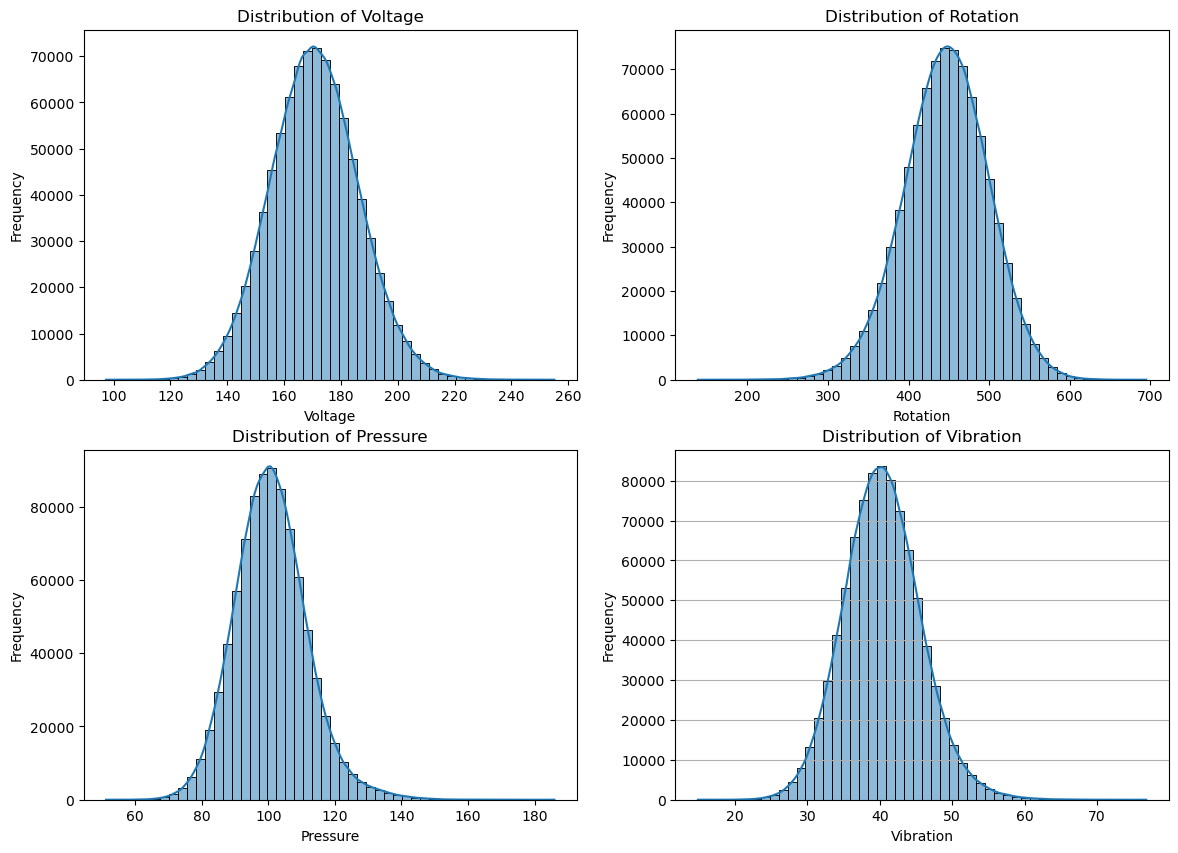

In [27]:
# Importing neccessary libraries for interative visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of telemetry data (voltage, rotation, pressure, vibration)
#  Rotation Distribution
sns.histplot(telemetry['rotate'], bins=50, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Rotation')
axs[0, 1].set_xlabel('Rotation')
axs[0, 1].set_ylabel('Frequency')

# Voltage Distribution
sns.histplot(telemetry['volt'], bins=50, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Voltage')
axs[0, 0].set_xlabel('Voltage')
axs[0, 0].set_ylabel('Frequency')


# Pressure  Distribution
sns.histplot(telemetry['pressure'], bins=50, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Pressure')
axs[1, 0].set_xlabel('Pressure')
axs[1, 0].set_ylabel('Frequency')


# Vibration Distribution
sns.histplot(telemetry['vibration'], bins=50, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Vibration')
axs[1, 1].set_xlabel('Vibration')
axs[1, 1].set_ylabel('Frequency')


# Enhance visibility by adding grid lines  
plt.grid(axis='y')

plt.show()


TIME SERIES ANALYSIS
To understand the changes in each of the key features (voltage, rotation, pressure, and vibration), It requires an analysis of time series trends in telemetry data.

In [28]:
telemetry.head()

,machineID,volt,rotate,pressure,vibration,datetime_new
0,1,176.217853,418.504078,113.077935,45.087686,2015-01-01 06:00:00
1,1,162.879223,402.747490,95.460525,43.413973,2015-01-01 07:00:00
2,1,170.989902,527.349825,75.237905,34.178847,2015-01-01 08:00:00
3,1,162.462833,346.149335,109.248561,41.122144,2015-01-01 09:00:00
4,1,157.610021,435.376873,111.886648,25.990511,2015-01-01 10:00:00


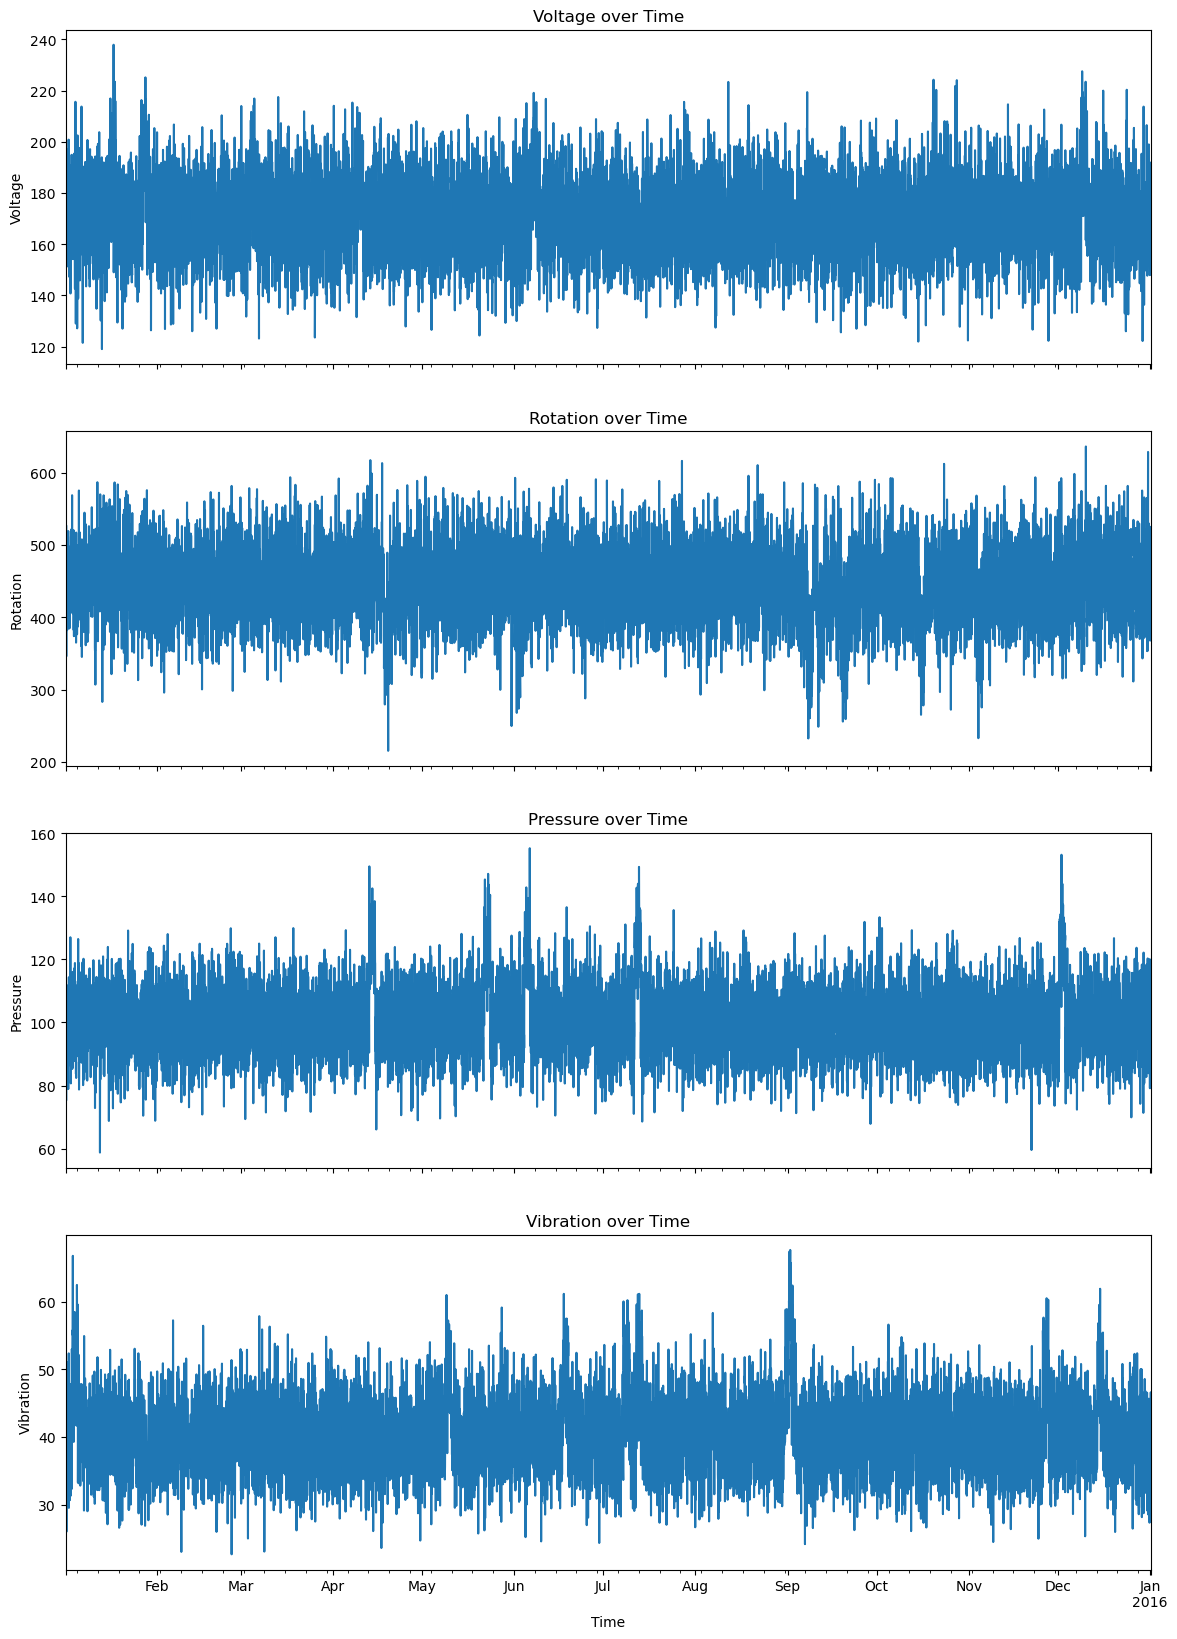

In [29]:
# Time Series Analysis of Telemetry Data for a sample machine
sample_machine = telemetry[telemetry['machineID'] == 1]
sample_machine.set_index('datetime_new', inplace=True)

fig, axs = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

sample_machine['volt'].plot(ax=axs[0])
axs[0].set_title('Voltage over Time')
axs[0].set_ylabel('Voltage')

sample_machine['rotate'].plot(ax=axs[1])
axs[1].set_title('Rotation over Time')
axs[1].set_ylabel('Rotation')

sample_machine['pressure'].plot(ax=axs[2])
axs[2].set_title('Pressure over Time')
axs[2].set_ylabel('Pressure')

sample_machine['vibration'].plot(ax=axs[3])
axs[3].set_title('Vibration over Time')
axs[3].set_ylabel('Vibration')

plt.xlabel('Time')
plt.show()

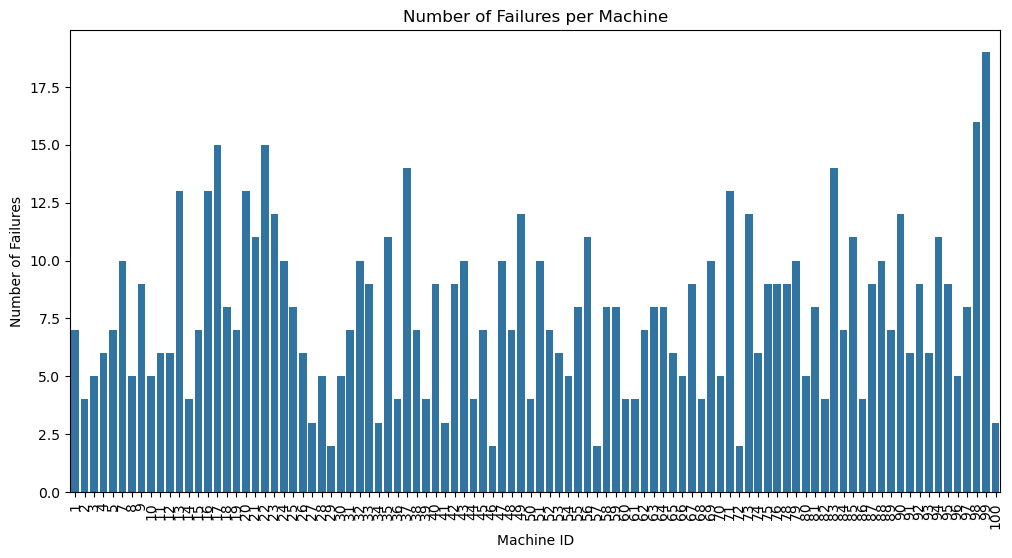

In [30]:
# To analyze the number of failures per machine locally,
# Number of failures per machine
failures_per_machine = failures['machineID'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=failures_per_machine.index, y=failures_per_machine.values)

plt.title('Number of Failures per Machine')
plt.xlabel('Machine ID')
plt.ylabel('Number of Failures')

# To rotate the x-axis label by 90degress for clarity
plt.xticks(rotation=90)

plt.show()




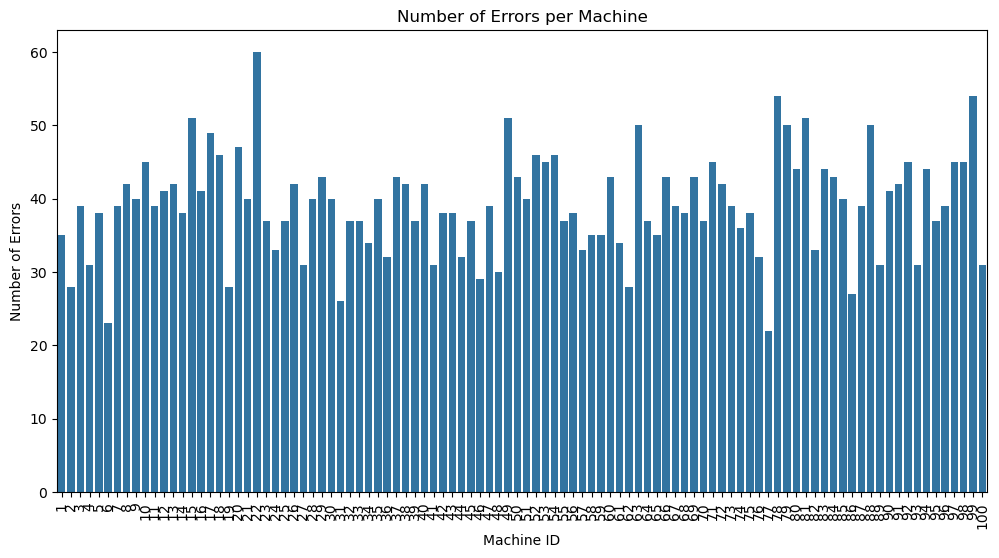

In [31]:
# To analyze the number of errors per machine locally,
# Number of failures per machine
errors_per_machine = errors['machineID'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=errors_per_machine.index, y=errors_per_machine.values)

plt.title('Number of Errors per Machine')
plt.xlabel('Machine ID')
plt.ylabel('Number of Errors')

# To rotate the x-axis label by 90degress for clarity
plt.xticks(rotation=90)

plt.show()

To smooth out short-term fluctuations, identify trends, analyze the underlying structure of the data

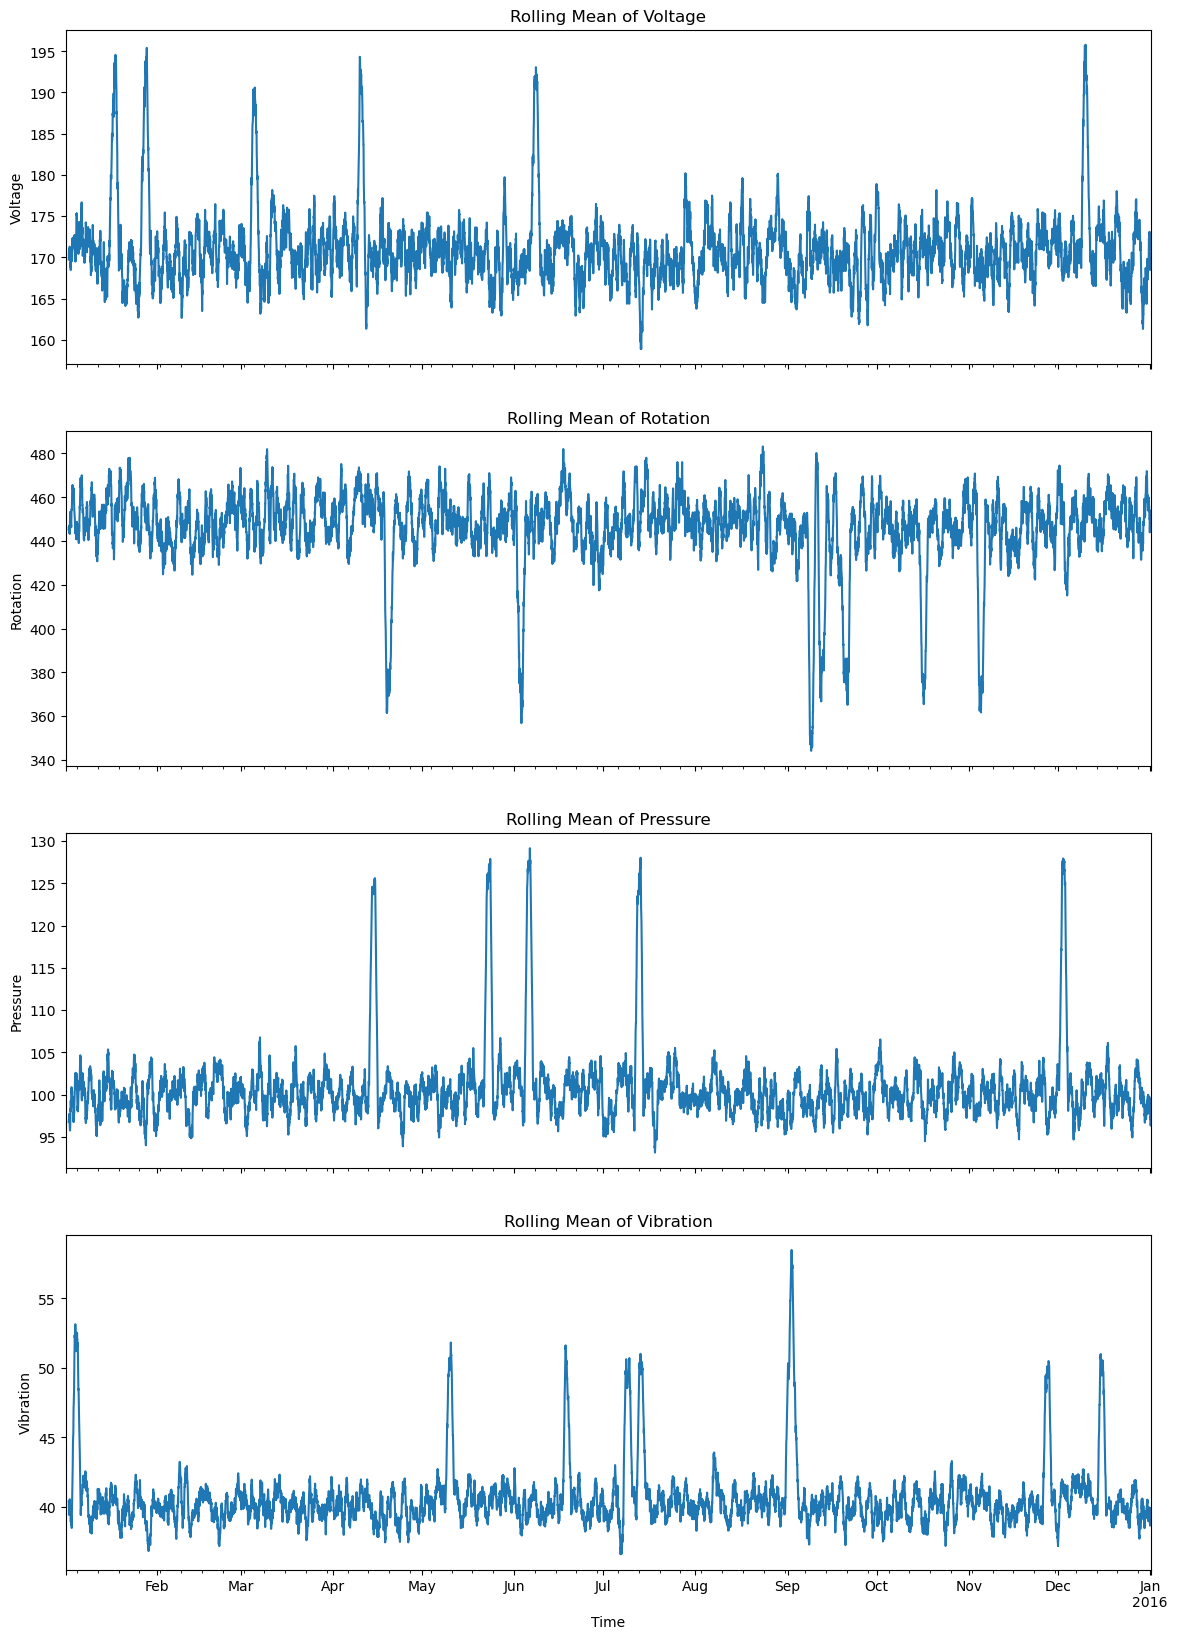

In [32]:
# Calculate and plot moving averages and rolling statistics
# 24 hours window
rolling_window = 24 

fig, axs = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

# Shows the smoothed trend of voltage over time
sample_machine['volt'].rolling(window=rolling_window).mean().plot(ax=axs[0])
axs[0].set_title('Rolling Mean of Voltage')
axs[0].set_ylabel('Voltage')

# Highlights the long-term trends in the machine's rotation speed
sample_machine['rotate'].rolling(window=rolling_window).mean().plot(ax=axs[1])
axs[1].set_title('Rolling Mean of Rotation')
axs[1].set_ylabel('Rotation')

# Provides a clearer picture of the pressure trends by smoothing out short-term noise,
sample_machine['pressure'].rolling(window=rolling_window).mean().plot(ax=axs[2])
axs[2].set_title('Rolling Mean of Pressure')
axs[2].set_ylabel('Pressure')

# Identifies significant patterns and trends in vibration data,
sample_machine['vibration'].rolling(window=rolling_window).mean().plot(ax=axs[3])
axs[3].set_title('Rolling Mean of Vibration')
axs[3].set_ylabel('Vibration')

plt.xlabel('Time')
plt.show()

ERROR ANALYSIS

To identify paterrns of error over a period of Time (specifically focusing on the hour of the day), 

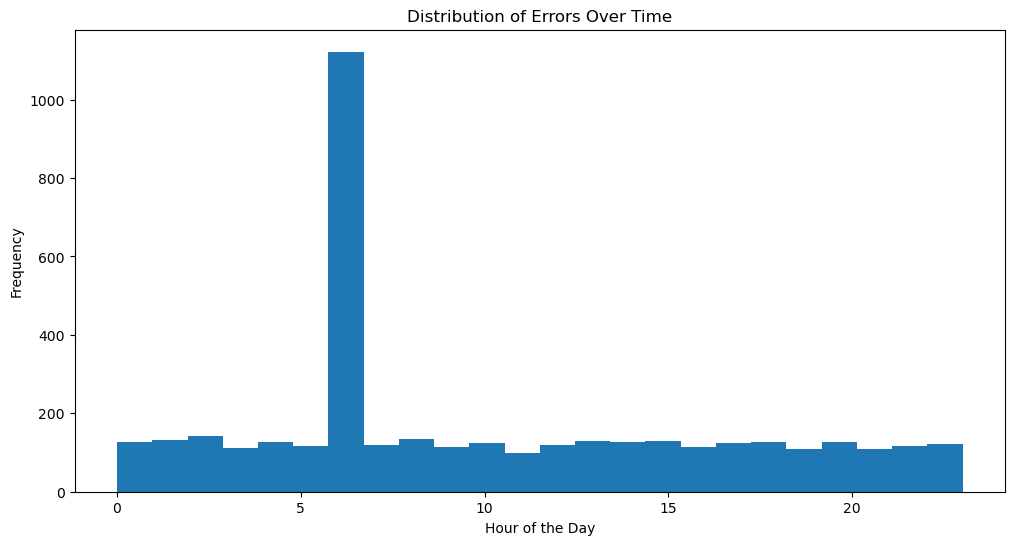

In [33]:
# Distribution of Errors Over Time using Histogram
errors['datetime_new'].dt.hour.plot(kind='hist', bins=24, figsize=(12, 6))
plt.title('Distribution of Errors Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

To visualize the distribution of time between failures using a Kernel Density Estimate (KDE) overlay.

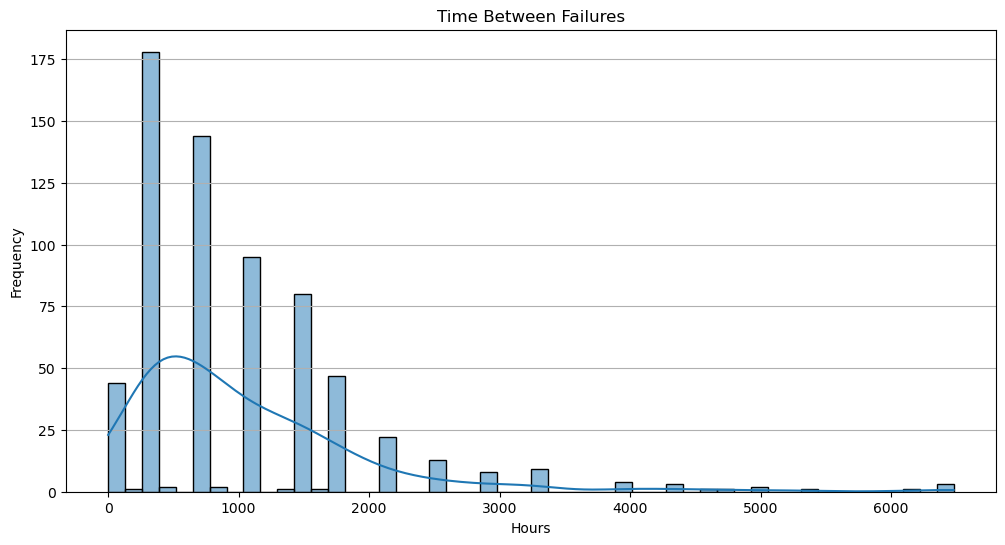

In [34]:
# Failure Analysis using histogram with a Kernel Density Estimate (KDE) overlay
time_between_failures = failures.groupby('machineID')['datetime_new'].diff().dt.total_seconds() / 3600
plt.figure(figsize=(12, 6))
sns.histplot(time_between_failures.dropna(), bins=50, kde=True)
plt.title('Time Between Failures')
plt.xlabel('Hours')
plt.ylabel('Frequency')

# For Better visibility I'd add grid lines  
plt.grid(axis='y')

plt.show()

In [35]:
# Maintenance Analysis, categorize maintenance records into proactive and reactive types, 
proactive_maint = maint[~maint['datetime_new'].isin(failures['datetime_new'])]
reactive_maint = maint[maint['datetime_new'].isin(failures['datetime_new'])]

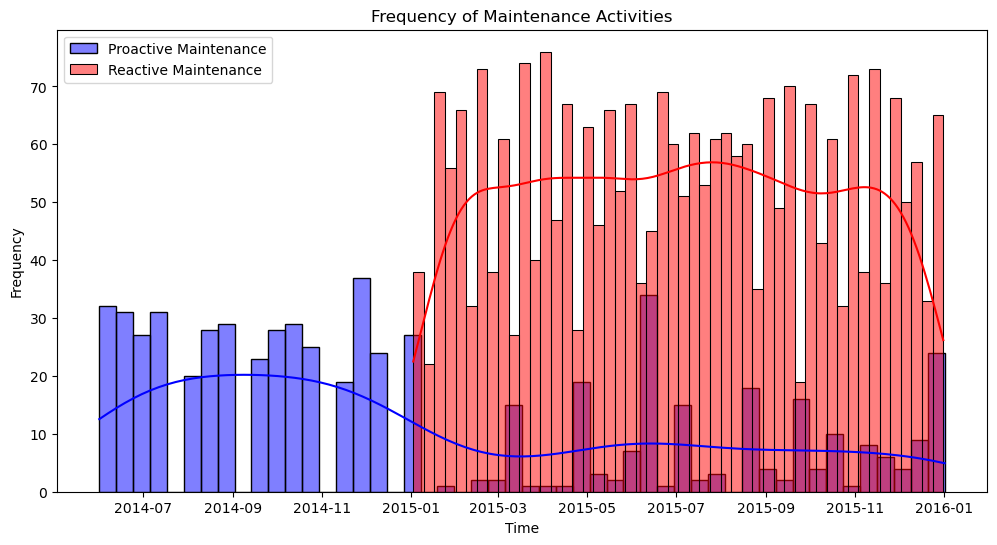

In [36]:
# Frequency of maintenance activities
plt.figure(figsize=(12, 6))
sns.histplot(proactive_maint['datetime_new'], bins=50, color='blue', label='Proactive Maintenance', kde=True)
sns.histplot(reactive_maint['datetime_new'], bins=50, color='red', label='Reactive Maintenance', kde=True)
plt.title('Frequency of Maintenance Activities')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()

plt.show()

   machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8
3          4  model3    7
4          5  model3    2
   machineID failure        datetime_new
0          1   comp4 2015-01-05 06:00:00
1          1   comp1 2015-03-06 06:00:00
2          1   comp2 2015-04-20 06:00:00
3          1   comp4 2015-06-19 06:00:00
4          1   comp4 2015-09-02 06:00:00


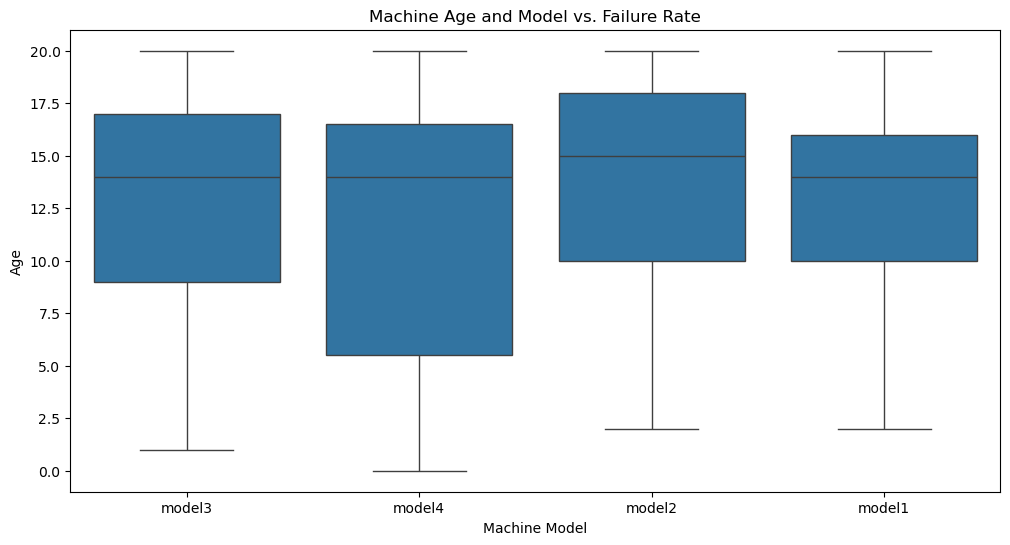

In [41]:
# Machine Feature Analysis
print(machines.head())  
print(failures.head())

machines_failures = pd.merge(machines, failures, on='machineID')
plt.figure(figsize=(12, 6))
sns.boxplot(x='model', y='age', data=machines_failures)
plt.title('Machine Age and Model vs. Failure Rate')
plt.xlabel('Machine Model')
plt.ylabel('Age')
plt.show()

   machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8
3          4  model3    7
4          5  model3    2
   machineID failure        datetime_new
0          1   comp4 2015-01-05 06:00:00
1          1   comp1 2015-03-06 06:00:00
2          1   comp2 2015-04-20 06:00:00
3          1   comp4 2015-06-19 06:00:00
4          1   comp4 2015-09-02 06:00:00


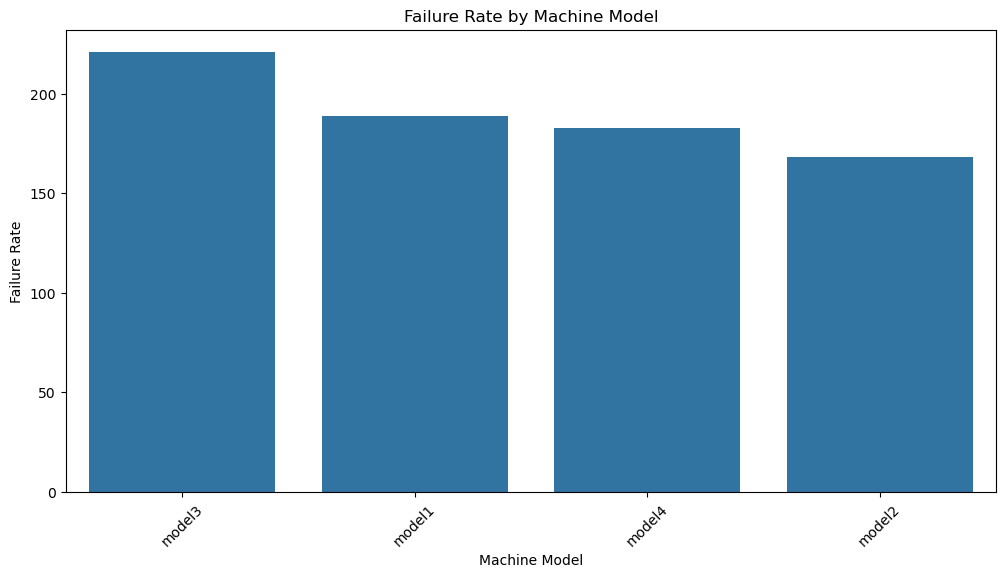

In [42]:
# Failure rate by machine model

print(machines.head())  
print(failures.head())


failures_by_model = machines_failures['model'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=failures_by_model.index, y=failures_by_model.values)
plt.title('Failure Rate by Machine Model')
plt.xlabel('Machine Model')
plt.ylabel('Failure Rate')

plt.xticks(rotation=45)

plt.show()

In [43]:
print(machines.head())
print(machines['age'].isnull().sum())
print(machines['age'].dtype)  # To reconfirm the datatype int or float

   machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8
3          4  model3    7
4          5  model3    2
0
int64


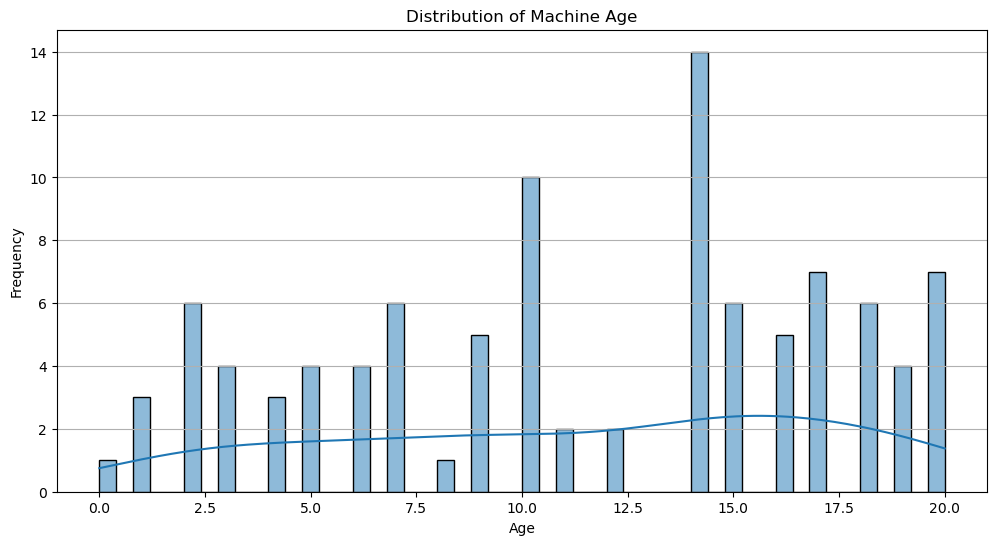

In [44]:
# Machine age distribution
plt.figure(figsize=(12, 6))
sns.histplot(machines['age'], bins=50, kde=True)
plt.title('Distribution of Machine Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Enhance visibility by adding grid lines  
plt.grid(axis='y')

plt.show()

In [45]:
print(errors.head())  
print(failures.head())
print(machines.head())  
print(maint.head())
print(telemetry.head())  

   machineID errorID        datetime_new   model  age
0          1  error1 2015-01-03 07:00:00  model3   18
1          1  error3 2015-01-03 20:00:00  model3   18
2          1  error5 2015-01-04 06:00:00  model3   18
3          1  error4 2015-01-10 15:00:00  model3   18
4          1  error4 2015-01-22 10:00:00  model3   18
   machineID failure        datetime_new
0          1   comp4 2015-01-05 06:00:00
1          1   comp1 2015-03-06 06:00:00
2          1   comp2 2015-04-20 06:00:00
3          1   comp4 2015-06-19 06:00:00
4          1   comp4 2015-09-02 06:00:00
   machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8
3          4  model3    7
4          5  model3    2
   machineID   comp        datetime_new
0          1  comp2 2014-06-01 06:00:00
1          1  comp4 2014-07-16 06:00:00
2          1  comp3 2014-07-31 06:00:00
3          1  comp1 2014-12-13 06:00:00
4          1  comp4 2015-01-05 06:00:00
   machineID        volt      rota

In [46]:
print(machines['model'].dtype)  # To reconfirm the datatype int or float

object


In [47]:
# Aggregating Telemetry Data
def create_agg_features(df, time_window, agg_funcs):
    df.set_index('datetime_new', inplace=True)
    df_agg = df.groupby('machineID').rolling(time_window).agg(agg_funcs).reset_index()
    new_col_names = ['machineID', 'datetime_new']
    for col in df.columns[1:]:
        for func in agg_funcs:
            new_col_names.append(f'{col}_{func}_{time_window}')
    df_agg.columns = new_col_names
    return df_agg

agg_funcs = ['mean', 'std', 'min', 'max']
telemetry_features_24h = create_agg_features(telemetry.copy(), '24h', agg_funcs)
telemetry_features_72h = create_agg_features(telemetry.copy(), '72h', agg_funcs)
#I had an issue while trying to perform aggregation on columns that contain non numeric data, 
# I got an erro message that indicates that there's an attempt to perform operations like 
# mean, standard deviation, min, and max on data that includes a string or object type column (e.g., the model3 string).

In [48]:
print(machines['model'].dtype)  # To reconfirm the datatype int or float to understand why the error
#print(telemetry['model'].dtype)
print(machines['age'].dtype)
#print(telemetry['age'].dtype)

object
int64


Preparing Data for Predictive Model

In [49]:
# To see that datetime columns are correctly named
failures.head()

,machineID,failure,datetime_new
0,1,comp4,2015-01-05 06:00:00
1,1,comp1,2015-03-06 06:00:00
2,1,comp2,2015-04-20 06:00:00
3,1,comp4,2015-06-19 06:00:00
4,1,comp4,2015-09-02 06:00:00


In [50]:
# To see that datetime columns are correctly named
errors.head()

,machineID,errorID,datetime_new,model,age
0,1,error1,2015-01-03 07:00:00,model3,18
1,1,error3,2015-01-03 20:00:00,model3,18
2,1,error5,2015-01-04 06:00:00,model3,18
3,1,error4,2015-01-10 15:00:00,model3,18
4,1,error4,2015-01-22 10:00:00,model3,18


In [51]:
# Ensure all datetime columns are correctly named before proceeding
errors.rename(columns={'datetime': 'datetime_new'}, inplace=True)
failures.rename(columns={'datetime': 'datetime_new'}, inplace=True)

# Aggregating Telemetry Data
def create_agg_features(df, time_window, agg_funcs):
    df.set_index('datetime_new', inplace=True)
    df_agg = df.groupby('machineID').rolling(time_window).agg(agg_funcs).reset_index()
    new_col_names = ['machineID', 'datetime_new']
    for col in df.columns[1:]:
        for func in agg_funcs:
            new_col_names.append(f'{col}_{func}_{time_window}')
    df_agg.columns = new_col_names
    return df_agg

agg_funcs = ['mean', 'std', 'min', 'max']
telemetry_features_24h = create_agg_features(telemetry.copy(), '24h', agg_funcs)
telemetry_features_72h = create_agg_features(telemetry.copy(), '72h', agg_funcs)
# So I removed the model and age column previously merged to the telemetry table, 
# Error cleared

In [52]:
# Aggregated features are then merged together with suffixes 
# to distinguish between the 24-hour and 72-hour features.
telemetry_features = pd.merge(telemetry_features_24h, telemetry_features_72h, on=['machineID', 'datetime_new'], suffixes=('_24h', '_72h'))

In [53]:
# Counting the number of errors per machine in 24-hour intervals
errors['error_count'] = 1
error_counts = errors.set_index('datetime_new').groupby(['machineID', 'errorID']).resample('24H').size().reset_index(name='count')
error_counts_pivot = error_counts.pivot_table(index=['machineID', 'datetime_new'], columns='errorID', values='count', fill_value=0).reset_index()
error_counts_pivot.columns = ['machineID', 'datetime_new'] + [f'error_count_{col}' for col in error_counts_pivot.columns[2:]]

C:\Users\PERSONAL PC\AppData\Local\Temp\ipykernel_43976\2572542397.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  error_counts = errors.set_index('datetime_new').groupby(['machineID', 'errorID']).resample('24H').size().reset_index(name='count')


In [54]:
# To generates lag features for telemetry data, which can capture the historical trends
# Lag Features for Telemetry
def create_lag_features(df, lags):
    lagged_features = df.copy()
    for lag in lags:
        for col in df.columns[2:]:
            lagged_features[f'{col}_lag_{lag}h'] = df.groupby('machineID')[col].shift(lag)
    return lagged_features

lags = [1, 24, 72]
telemetry_lag_features = create_lag_features(telemetry, lags)

In [55]:
# Extracting Cyclic Features to help capture the cyclic nature of time
def add_cyclic_features(df, col):
    df[f'{col}_sin'] = np.sin(2 * np.pi * df[col] / max(df[col]))
    df[f'{col}_cos'] = np.cos(2 * np.pi * df[col] / max(df[col]))
    return df

telemetry_features['hour'] = telemetry_features['datetime_new'].dt.hour
telemetry_features['day'] = telemetry_features['datetime_new'].dt.dayofweek
telemetry_features['month'] = telemetry_features['datetime_new'].dt.month

telemetry_features = add_cyclic_features(telemetry_features, 'hour')
telemetry_features = add_cyclic_features(telemetry_features, 'day')
telemetry_features = add_cyclic_features(telemetry_features, 'month')

In [56]:
# Prepare Failures DataFrame by ensuring each failure is marked with a 1, 
# while duplicates are also dropped to avoid multiple counts of failure event.
failures['failure'] = 1
failures_agg = failures[['machineID', 'datetime_new', 'failure']].drop_duplicates()

In [57]:
# Merging All Features into a single dataframe
features = pd.merge(telemetry_features, error_counts_pivot, on=['machineID', 'datetime_new'], how='left')
features = pd.merge(features, telemetry_lag_features, on=['machineID', 'datetime_new'], how='left')
features = pd.merge(features, machines, on='machineID', how='left')
features = pd.merge(features, failures_agg, on=['machineID', 'datetime_new'], how='left')  # Ensure failures are included

In [58]:
# Filling values (NaNs)
features.fillna(0, inplace=True)

# Check the DataFrame to confirm the 'failure' column is present
print(features.head())
print(features.columns)
#Filling NaN values according to the datatype of each column helps you 
# maintain data integrity and avoids future warnings or errors in your data processing pipeline.

C:\Users\PERSONAL PC\AppData\Local\Temp\ipykernel_43976\438418955.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  features.fillna(0, inplace=True)


   machineID        datetime_new  volt_mean_24h  volt_std_24h  volt_min_24h  \
0          1 2015-01-01 06:00:00     176.217853      0.000000    176.217853   
1          1 2015-01-01 07:00:00     169.548538      9.431836    162.879223   
2          1 2015-01-01 08:00:00     170.028993      6.721032    162.879223   
3          1 2015-01-01 09:00:00     168.137453      6.665324    162.462833   
4          1 2015-01-01 10:00:00     166.031967      7.448844    157.610021   

   volt_max_24h  rotate_mean_24h  rotate_std_24h  rotate_min_24h  \
0    176.217853       418.504078        0.000000      418.504078   
1    176.217853       410.625784       11.141591      402.747490   
2    176.217853       449.533798       67.849599      402.747490   
3    176.217853       423.687682       75.770259      346.149335   
4    176.217853       426.025520       65.826868      346.149335   

   rotate_max_24h  ...  pressure_lag_24h  vibration_lag_24h  \
0      418.504078  ...               0.0             

In [59]:
# Split the data into features and target
X = features.drop(columns=['datetime_new', 'datetime_new_lag_1h', 'datetime_new_lag_72h', 'datetime_new_lag_24h', 'model', 'failure'])
y = features['failure']

# Proceed with the model training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# To check the shapes of the resulting datasets , if need be
print("X_train shape:", X_train.shape)  
print("X_test shape:", X_test.shape)  
print("y_train shape:", y_train.shape)  
print("y_test shape:", y_test.shape)  

X_train shape: (700880, 61)
X_test shape: (175220, 61)
y_train shape: (700880,)
y_test shape: (175220,)


In [60]:
# Check for Timestamp or datetime column
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700880 entries, 523364 to 121958
Data columns (total 61 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   machineID           700880 non-null  int64  
 1   volt_mean_24h       700880 non-null  float64
 2   volt_std_24h        700880 non-null  float64
 3   volt_min_24h        700880 non-null  float64
 4   volt_max_24h        700880 non-null  float64
 5   rotate_mean_24h     700880 non-null  float64
 6   rotate_std_24h      700880 non-null  float64
 7   rotate_min_24h      700880 non-null  float64
 8   rotate_max_24h      700880 non-null  float64
 9   pressure_mean_24h   700880 non-null  float64
 10  pressure_std_24h    700880 non-null  float64
 11  pressure_min_24h    700880 non-null  float64
 12  pressure_max_24h    700880 non-null  float64
 13  vibration_mean_24h  700880 non-null  float64
 14  vibration_std_24h   700880 non-null  float64
 15  vibration_min_24h   700880 non-nul

In [61]:
y.dtype

dtype('float64')

In [62]:
# Count unique values in the training target variable  
class_distribution = y_train.value_counts()  

# Display the class distribution  
print(class_distribution)  

failure
0.0    700301
1.0       579
Name: count, dtype: int64


In [63]:
# Define the resampling strategy
smote = SMOTE(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after SMOTE:
failure
0.0    700301
1.0    700301
Name: count, dtype: int64


In [64]:
# Fit and resample the training data
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

In [65]:
# Define models
lgb_clf = lgb.LGBMClassifier(n_jobs=-1, class_weight='balanced', random_state=42)
cat_clf = CatBoostClassifier(class_weights=[1, 10], random_state=42, verbose=0)
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42)

# Fit the models
lgb_clf.fit(X_train_resampled, y_train_resampled)
cat_clf.fit(X_train_resampled, y_train_resampled)
xgb_clf.fit(X_train_resampled, y_train_resampled) 

[LightGBM] [Info] Number of positive: 700301, number of negative: 700301
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 3.079146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12717
[LightGBM] [Info] Number of data points in the train set: 1400602, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\PERSONAL PC\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:25:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)


Evaluating LightGBM:
LGBMClassifier - Accuracy: 0.9921, Precision: 0.9993, Recall: 0.9849, F1 Score: 0.9920

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    175080
         1.0       1.00      0.98      0.99    175080

    accuracy                           0.99    350160
   macro avg       0.99      0.99      0.99    350160
weighted avg       0.99      0.99      0.99    350160



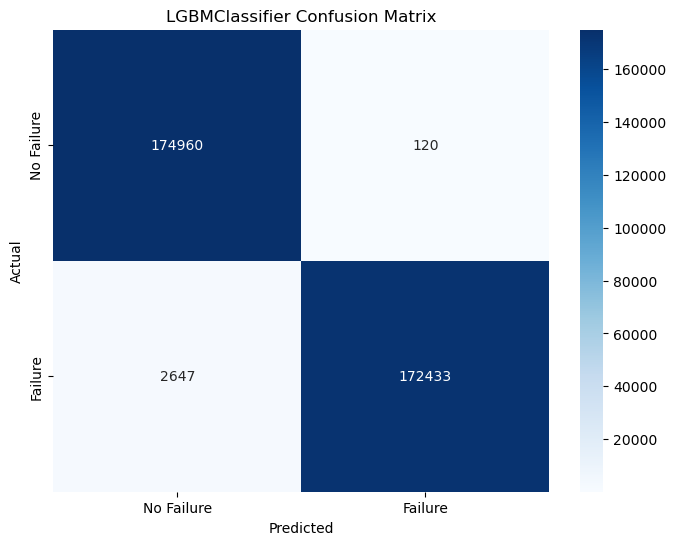

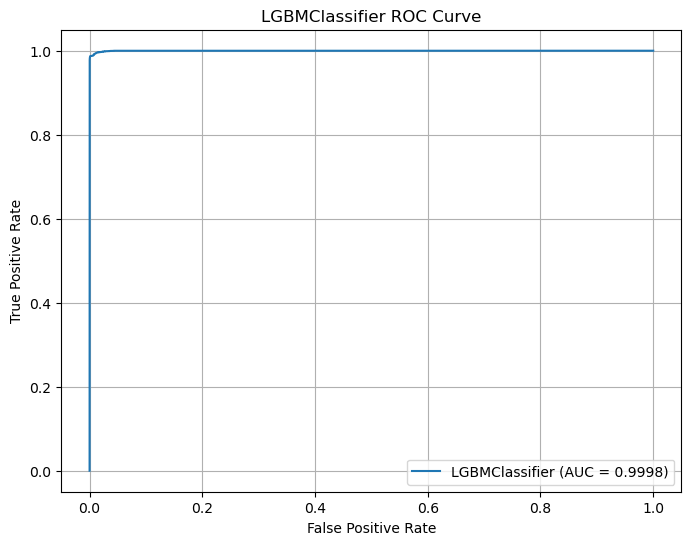

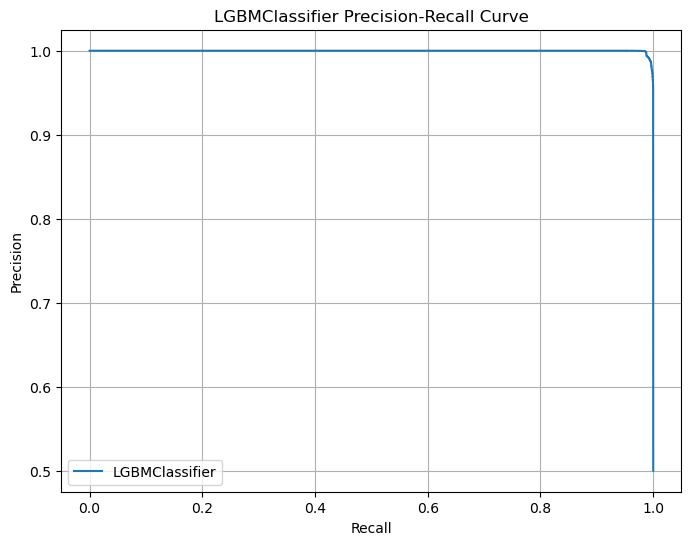


Evaluating CatBoost:
CatBoostClassifier - Accuracy: 0.9926, Precision: 0.9955, Recall: 0.9896, F1 Score: 0.9925

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    175080
         1.0       1.00      0.99      0.99    175080

    accuracy                           0.99    350160
   macro avg       0.99      0.99      0.99    350160
weighted avg       0.99      0.99      0.99    350160



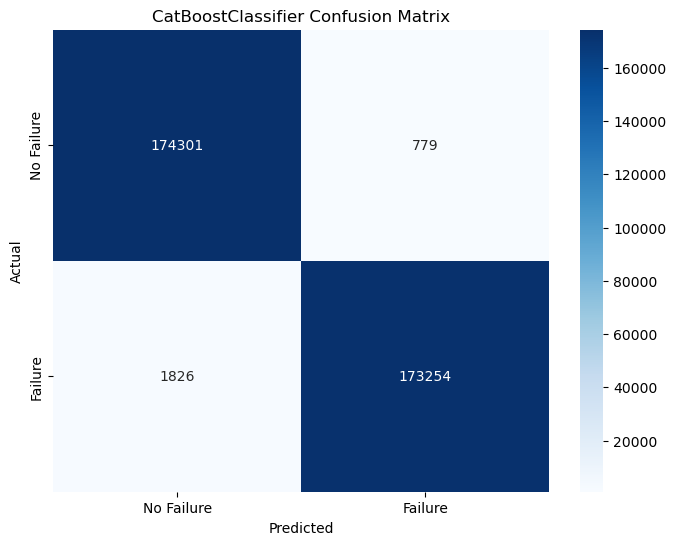

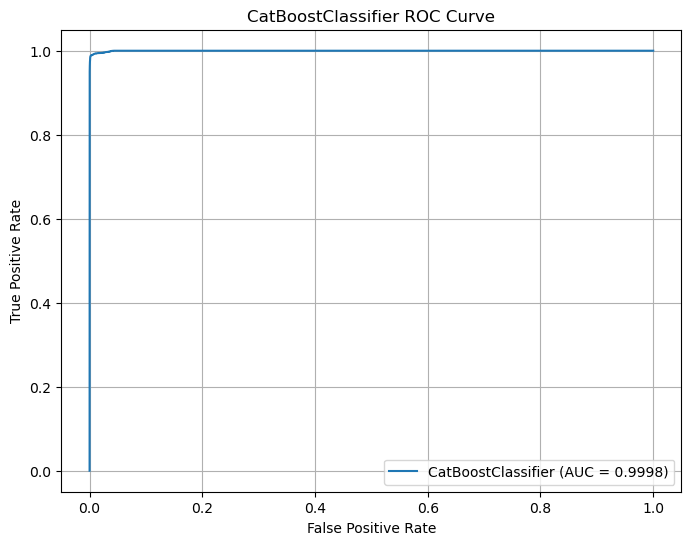

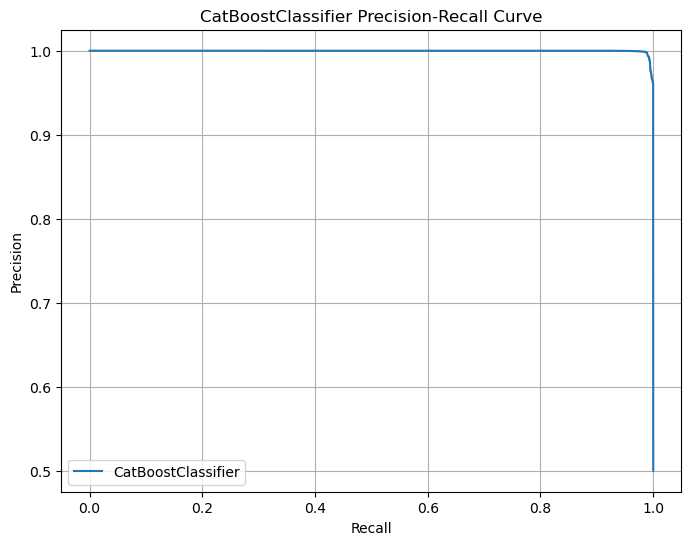


Evaluating XGBoost:
XGBClassifier - Accuracy: 0.9926, Precision: 0.9996, Recall: 0.9857, F1 Score: 0.9926

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    175080
         1.0       1.00      0.99      0.99    175080

    accuracy                           0.99    350160
   macro avg       0.99      0.99      0.99    350160
weighted avg       0.99      0.99      0.99    350160



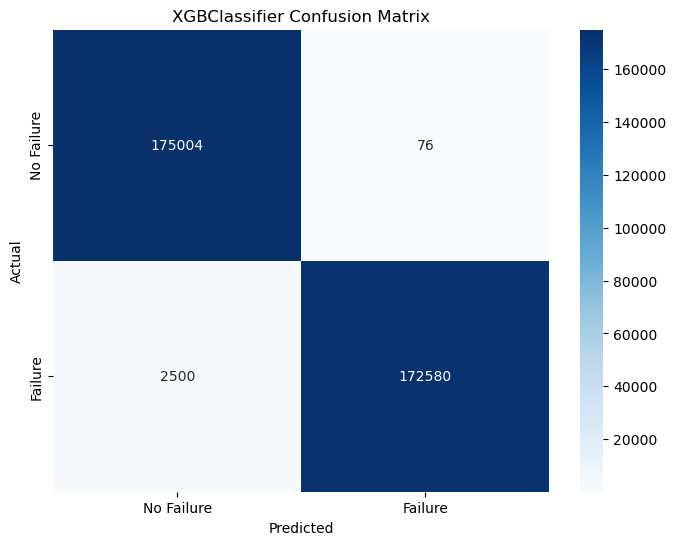

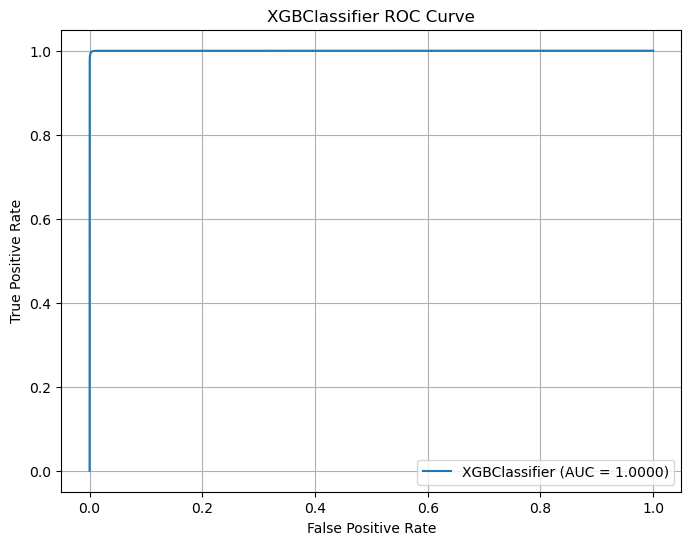

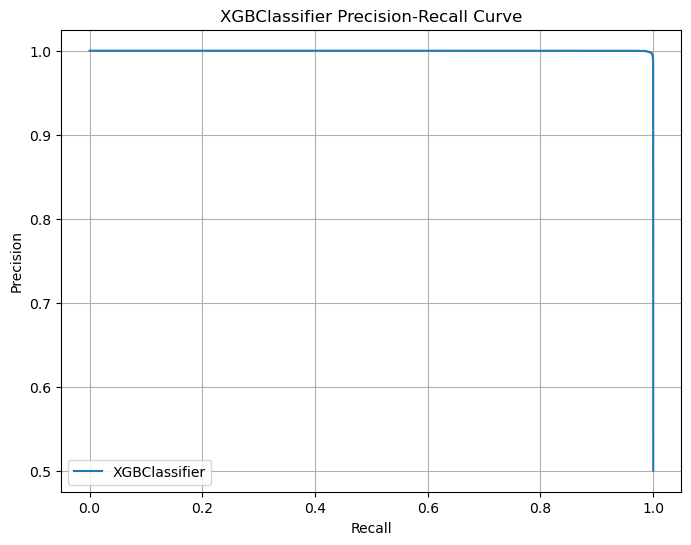

['xgb_model.pkl']

In [66]:
# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{model.__class__.__name__} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model.__class__.__name__} Confusion Matrix')
    plt.show()

    # ROC Curve and AUC
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc:.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model.__class__.__name__} ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=model.__class__.__name__)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model.__class__.__name__} Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

# Evaluate models
models = {'LightGBM': lgb_clf, 'CatBoost': cat_clf, 'XGBoost': xgb_clf}
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}:")
    evaluate_model(model, X_test_resampled, y_test_resampled)

# Save models
import joblib
joblib.dump(lgb_clf, 'lgb_model.pkl')
joblib.dump(cat_clf, 'cat_model.pkl')
joblib.dump(xgb_clf, 'xgb_model.pkl')

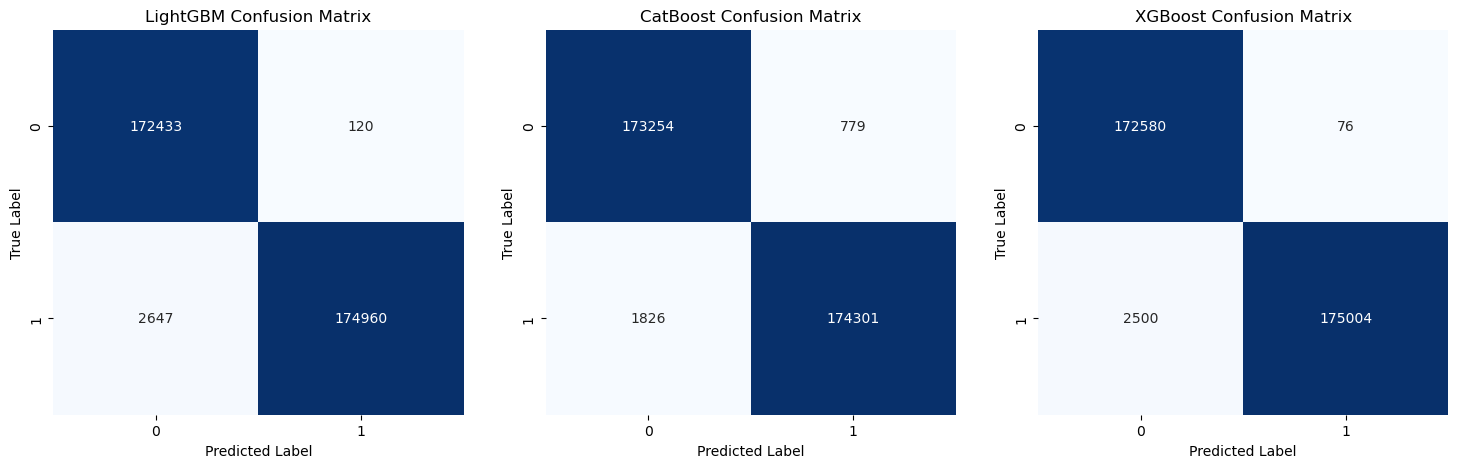

In [67]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrices for the models
conf_matrices = {
    'LightGBM': [[172433, 120], [2647, 174960]],
    'CatBoost': [[173254, 779], [1826, 174301]],
    'XGBoost': [[172580, 76], [2500, 175004]]
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (model, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(f'{model} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.show()